In [ ]:
# Author: Samiha Azeem

In [ ]:
# Predict Next-Day Stock Closing Price

# This notebook uses yfinance to download real stock data, processes it for regression, trains a model, and plots actual vs predicted values.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Load Historical Stock Data

In [2]:
stock = "AAPL"

df = yf.download(stock, start="2020-01-01", end="2025-01-01")
df.head()


/tmp/ipython-input-784911903.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468262,72.528582,71.223259,71.476600,135480400
2020-01-03,71.763741,72.523769,71.539352,71.696183,146322800
2020-01-06,72.335594,72.374200,70.634577,70.885509,118387200
2020-01-07,71.995354,72.600960,71.775789,72.345204,108872000
2020-01-08,73.153488,73.455087,71.698574,71.698574,132079200


Prepare Dataset for Next-Day Prediction

In [3]:
# Create a "target" column: next day closing price

df["Target"] = df["Close"].shift(-1)
df = df.dropna()

# .shift(-1) moves the Close column up by one row

# This means:

# Today Close      Tomorrow Close (Target)
#   150.0             	151.2
#   151.2	              149.8

In [5]:
df.head()

Price,Close,High,Low,Open,Volume,Target
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2020-01-02,72.468262,72.528582,71.223259,71.476600,135480400,71.763741
2020-01-03,71.763741,72.523769,71.539352,71.696183,146322800,72.335594
2020-01-06,72.335594,72.374200,70.634577,70.885509,118387200,71.995354
2020-01-07,71.995354,72.600960,71.775789,72.345204,108872000,73.153488
2020-01-08,73.153488,73.455087,71.698574,71.698574,132079200,74.707352


In [4]:
# Select Features
features = ["Open", "High", "Low", "Volume"]
X = df[features]
y = df["Target"]

In [6]:
# Train/Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [61]:
# Random Forest

model_rf = RandomForestRegressor(n_estimators=200,random_state=42)
model_rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

Predict Next-Day Closing Prices

In [62]:
predictions_lr = model_lr.predict(X_test)
predictions_rf = model_rf.predict(X_test)

Evaluate Error

In [63]:
mse = mean_squared_error(y_test, predictions_lr)
print(f"MSE Linear Regression: {mse:.3f}")
print(f"RMSE Linear regression: {np.sqrt(mse):.3f}")


#Random Forest
mse = mean_squared_error(y_test, predictions_rf)
print(f"\nMSE Random Forest: {mse:.3f}")
print(f"RMSE Random Forest: {np.sqrt(mse):.3f}")

MSE Linear Regression: 9.638
RMSE Linear regression: 3.105

MSE Random Forest: 676.959
RMSE Random Forest: 26.018


Plot: Actual vs Predicted

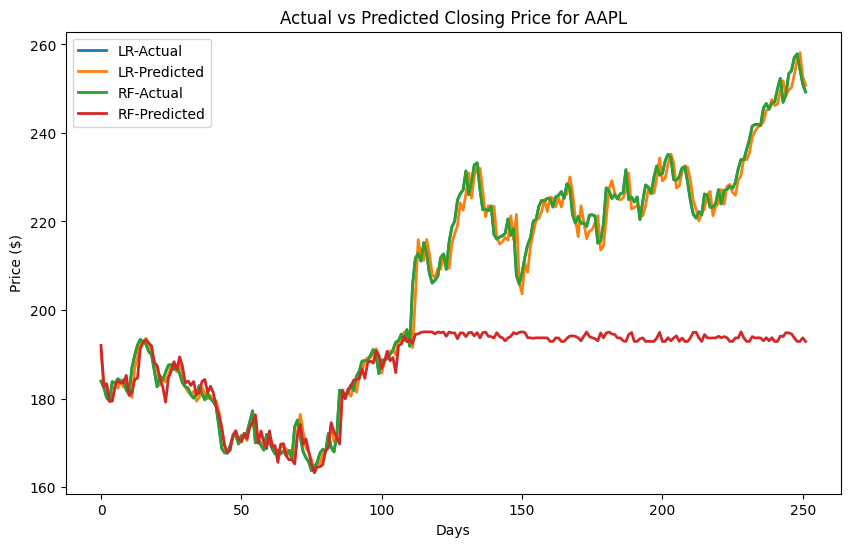

In [73]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="LR-Actual", linewidth=2)
plt.plot(predictions_lr, label="LR-Predicted", linewidth=2)
plt.title(f"Actual vs Predicted Closing Price for {stock}")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.plot(y_test.values, label="RF-Actual", linewidth=2)
plt.plot(predictions_rf, label="RF-Predicted", linewidth=2)
plt.legend()
plt.show()

Predict the Final Next-Day Price

In [69]:
#Linear Regression
latest_data = df[features].iloc[-1].values.reshape(1, -1)
next_day_price = model_lr.predict(latest_data)[0]

print(f"LR-Next-day predicted closing price for {stock}: ${next_day_price:.2f}")


#Random Forest
latest_data_rf = df[features].iloc[-1].values.reshape(1, -1)
next_day_price_rf = model_rf.predict(latest_data)[0]

print(f"RF-Next-day predicted closing price for {stock}: ${next_day_price_rf:.2f}")


LR-Next-day predicted closing price for AAPL: $250.80
RF-Next-day predicted closing price for AAPL: $192.89


In [67]:
actual_next_day_price = df['Close'].iloc[-1]  # last available Close
print(f"Actual closing price for {stock} on last day: ${actual_next_day_price.item():.2f}")

Actual closing price for AAPL on last day: $251.06


Observation / summary

In [70]:
# Linear Regression performed better due to the mostly linear trend in daily stock prices.

# Random Forest overfitted on the small dataset and limited features.

# Stock prices are highly volatile; simple models can capture short-term linear trends.

# Random Forest may require more data and features (e.g., technical indicators like SMA, EMA, RSI) for better performance.

# Predictions are made using the most recent available trading day (last row in the dataset).

# To save the trained model

In [ ]:
# import joblib

# Save Linear Regression model
# joblib.dump(model_lr, "linear_regression_model.pkl")

# Save Random Forest model
# joblib.dump(model_rf, "random_forest_model.pkl")
